# Imports

In [0]:
import pandas as pd 
import requests
import io
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [2]:
BASE_URL = "https://docs.google.com/spreadsheets/d/1VpLXByvbTfbgupDNWcUaBxdk72cW9FRExs0AgRVaF1g/export?format=csv&"
URL_PARTICIPANTS = BASE_URL+"gid=611260429"
URL_POSTURES = BASE_URL+"gid=961690077"
content_participants = requests.get(URL_PARTICIPANTS, verify=False).content
content_postures = requests.get(URL_POSTURES, verify=False).content
df_participants = pd.read_csv(io.StringIO(content_participants.decode('utf-8'))) 
df_postures = pd.read_csv(io.StringIO(content_postures.decode('utf-8'))) 
plt.rcParams['figure.dpi'] = 100

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [3]:
df_participants.head(1)

,ParticipantID,Age,Gender,DominantHand,AvgTimeSpent,WordsPerMinute,WordCount,Errors,TimeTakenS,TimeTakenM,MeanError,totalwords,time,sec
0,participant_1,27.0,Male,Right,10.0,57.0,89.0,15.0,94.0,1.561404,9.606742,104.0,1.561404,93.684211


In [4]:
df_postures.head(1)

,ParticipantID,Comfort_Below_Left_Fist_0,Preference_Below_Left_Fist_0,Comfort_Below_Right_Fist_0,Preference_Below_Right_Fist_0,Comfort_Below_Left_Fist_90,Preference_Below_Left_Fist_90,Comfort_Below_Right_Fist_90,Preference_Below_Right_Fist_90,Comfort_Below_Left_Fist_180,Preference_Below_Left_Fist_180,Comfort_Below_Right_Fist_180,Preference_Below_Right_Fist_180,Comfort_Below_Left_Palm_0,Preference_Below_Left_Palm_0,Comfort_Below_Right_Palm_0,Preference_Below_Right_Palm_0,Comfort_Below_Left_Palm_90,Preference_Below_Left_Palm_90,Comfort_Below_Right_Palm_90,Preference_Below_Right_Palm_90,Comfort_Below_Left_Palm_180,Preference_Below_Left_Palm_180,Comfort_Below_Right_Palm_180,Preference_Below_Right_Palm_180,Comfort_On_Left_Fist_0,Preference_On_Left_Fist_0,Comfort_On_Right_Fist_0,Preference_On_Right_Fist_0,Comfort_On_Left_Fist_90,Preference_On_Left_Fist_90,Comfort_On_Right_Fist_90,Preference_On_Right_Fist_90,Comfort_On_Left_Fist_180,Preference_On_Left_Fist_180,Comfort_On_Right_Fist_180,Preference_On_Right_Fist_180,Comfort_On_Left_Palm_0,Preference_On_Left_Palm_0,Comfort_On_Right_Palm_0,Preference_On_Right_Palm_0,Comfort_On_Left_Palm_90,Preference_On_Left_Palm_90,Comfort_On_Right_Palm_90,Preference_On_Right_Palm_90,Comfort_On_Left_Palm_180,Preference_On_Left_Palm_180,Comfort_On_Right_Palm_180,Preference_On_Right_Palm_180,Comfort_Beside_Left_Fist_0,Preference_Beside_Left_Fist_0,Comfort_Beside_Right_Fist_0,Preference_Beside_Right_Fist_0,Comfort_Beside_Left_Fist_90,Preference_Beside_Left_Fist_90,Comfort_Beside_Right_Fist_90,Preference_Beside_Right_Fist_90,Comfort_Beside_Left_Fist_180,Preference_Beside_Left_Fist_180,Comfort_Beside_Right_Fist_180,Preference_Beside_Right_Fist_180,Comfort_Beside_Left_Palm_0,Preference_Beside_Left_Palm_0,Comfort_Beside_Right_Palm_0,Preference_Beside_Right_Palm_0,Comfort_Beside_Left_Palm_90,Preference_Beside_Left_Palm_90,Comfort_Beside_Right_Palm_90,Preference_Beside_Right_Palm_90,Comfort_Beside_Left_Palm_180,Preference_Beside_Left_Palm_180,Comfort_Beside_Right_Palm_180,Preference_Beside_Right_Palm_180
0,participant_1,3,2,4,4,2,2,4,4,1,1,2,2,3,3,5,5,3,3,4,4,1,1,2,2,2,2,4,4,1,1,4,4,1,1,2,2,3,3,4,4,2,2,4,4,1,1,1,1,2,2,3,3,2,2,4,4,1,1,1,1,3,3,4,4,3,3,4,4,1,1,1,1


# Analysis

## Participants

In [5]:
# GENDER DISTRIBUTION
df_participants.Gender.value_counts()

Male      20
Female    10
Name: Gender, dtype: int64

In [6]:
# AVERAGE AGE
print("MEAN: ",df_participants["Age"].mean())
print("STD: ",df_participants["Age"].std())

MEAN:  24.566666666666666
STD:  2.4023455970813385


In [7]:
# AVERAGE USAGE
print("MEAN: ",df_participants["AvgTimeSpent"].mean())
print("STD: ",df_participants["AvgTimeSpent"].std())

MEAN:  7.0
STD:  3.723179953415795


In [8]:
# AVERAGE TYPING SPEED
print("MEAN: ",df_participants["WordsPerMinute"].mean())
print("STD: ",df_participants["WordsPerMinute"].std())

MEAN:  34.9
STD:  9.531617078855561


In [9]:
# AVERAGE ERROR RATE
print("MEAN: ",df_participants["MeanError"].mean())
print("STD: ",df_participants["MeanError"].std())

MEAN:  5.735205992738709
STD:  2.6533760931418673


## Postures

In [0]:
df_postures_comfort = df_postures.filter(regex='Comfort_')
df_postures_preference = df_postures.filter(regex='Preference_')

df_postures_comfort_mean = df_postures_comfort.mean()
df_postures_preference_mean = df_postures_preference.mean()
df_postures_comfort_dict = df_postures_comfort_mean.to_dict()
df_postures_preference_dict = df_postures_preference_mean.to_dict()
# df_postures_preference_mean.to_frame().transpose()
# df_postures_comfort.std()
df_postures_comfort_stats = pd.DataFrame(columns=['posture', 'mean', 'std'])
df_postures_comfort_stats["posture"] = [i.replace("Comfort_","") for i in df_postures_comfort.keys()]
df_postures_comfort_stats["mean"] = df_postures_comfort.mean().values
df_postures_comfort_stats["std"] = df_postures_comfort.std().values

df_postures_preference_stats = pd.DataFrame(columns=['posture', 'mean', 'std'])
df_postures_preference_stats["posture"] = [i.replace("Preference_","") for i in df_postures_preference.keys()]
df_postures_preference_stats["mean"] = df_postures_preference.mean().values
df_postures_preference_stats["std"] = df_postures_preference.std().values

df_postures_comfort_stats= df_postures_comfort_stats.sort_values(by = "mean", ascending=False)
df_postures_preference_stats= df_postures_preference_stats.sort_values(by = "mean", ascending=False)
df_postures_comfort_stats['rating']='comfort'
df_postures_preference_stats['rating']='preference'

In [62]:
# df = pd.DataFrame(columns=['mean', 'std'])

df_postures_comfort_stats.head()
df_postures_preference_stats.head()

,posture,mean,std,rating
19,On_Right_Palm_0,4.366667,0.964305,preference
7,Below_Right_Palm_0,4.300000,0.702213,preference
3,Below_Right_Fist_90,4.200000,1.095445,preference
18,On_Left_Palm_0,3.933333,1.112107,preference
6,Below_Left_Palm_0,3.933333,0.944433,preference


In [63]:
pd.concat([df_postures_comfort_stats, df_postures_preference_stats],axis=1)

,posture,mean,std,rating,posture,mean,std,rating
0,Below_Left_Fist_0,3.700000,1.087547,comfort,Below_Left_Fist_0,3.466667,0.899553,preference
1,Below_Right_Fist_0,3.933333,1.048261,comfort,Below_Right_Fist_0,3.733333,0.980265,preference
2,Below_Left_Fist_90,3.866667,1.252125,comfort,Below_Left_Fist_90,3.666667,1.321789,preference
3,Below_Right_Fist_90,4.300000,0.952311,comfort,Below_Right_Fist_90,4.200000,1.095445,preference
4,Below_Left_Fist_180,2.133333,0.973204,comfort,Below_Left_Fist_180,2.300000,1.235956,preference
5,Below_Right_Fist_180,2.500000,1.074789,comfort,Below_Right_Fist_180,2.500000,1.196259,preference
6,Below_Left_Palm_0,4.133333,0.860366,comfort,Below_Left_Palm_0,3.933333,0.944433,preference
7,Below_Right_Palm_0,4.333333,0.660895,comfort,Below_Right_Palm_0,4.300000,0.702213,preference
8,Below_Left_Palm_90,3.666667,1.093345,comfort,Below_Left_Palm_90,3.533333,1.105888,preference
9,Below_Right_Palm_90,3.966667,0.999425,comfort,Below_Right_Palm_90,3.700000,0.952311,preference


In [0]:
# pandas sort_values in reverse (higher score is better)
# Convert Pandas Series to Python Str, remove alll extra whitespaces and split by \n to get list of Strings
# Match whitespace but not newlines: https://stackoverflow.com/questions/3469080/match-whitespace-but-not-newlines 

l1= re.sub(r'\s+[^\S\r\n]', ' = ',str(df_postures_comfort_mean.sort_values(ascending=False))).split("\n")
l2= re.sub(r'\s+[^\S\r\n]', ' = ',str(df_postures_preference_mean.sort_values(ascending=False))).split("\n")

In [0]:
# construct a new dataframe
posture_comparison = pd.DataFrame(list(zip(l1,l2)), columns = ['Comfort' , 'Preference'])

In [16]:
# remove string value from column in pandas dataframe: https://stackoverflow.com/questions/33413249/how-to-remove-string-value-from-column-in-pandas-dataframe
posture_comparison["Comfort"] = posture_comparison.Comfort.str.replace("Comfort_",'')
posture_comparison["Preference"] = posture_comparison.Preference.str.replace("Preference_",'')
posture_comparison.head(12)

,Comfort,Preference
0,On_Right_Palm_0 = 4.366667,On_Right_Palm_0 = 4.366667
1,Below_Right_Palm_0 = 4.333333,Below_Right_Palm_0 = 4.300000
2,Below_Right_Fist_90 = 4.300000,Below_Right_Fist_90 = 4.200000
3,Below_Left_Palm_0 = 4.133333,Below_Left_Palm_0 = 3.933333
4,On_Left_Palm_0 = 4.066667,On_Left_Palm_0 = 3.933333
5,Beside_Right_Palm_0 = 4.033333,On_Right_Palm_90 = 3.800000
6,Below_Right_Palm_90 = 3.966667,Below_Right_Fist_0 = 3.733333
7,Below_Right_Fist_0 = 3.933333,Below_Right_Palm_90 = 3.700000
8,Beside_Right_Palm_90 = 3.866667,Below_Left_Fist_90 = 3.666667
9,Beside_Left_Palm_0 = 3.866667,On_Right_Fist_90 = 3.600000


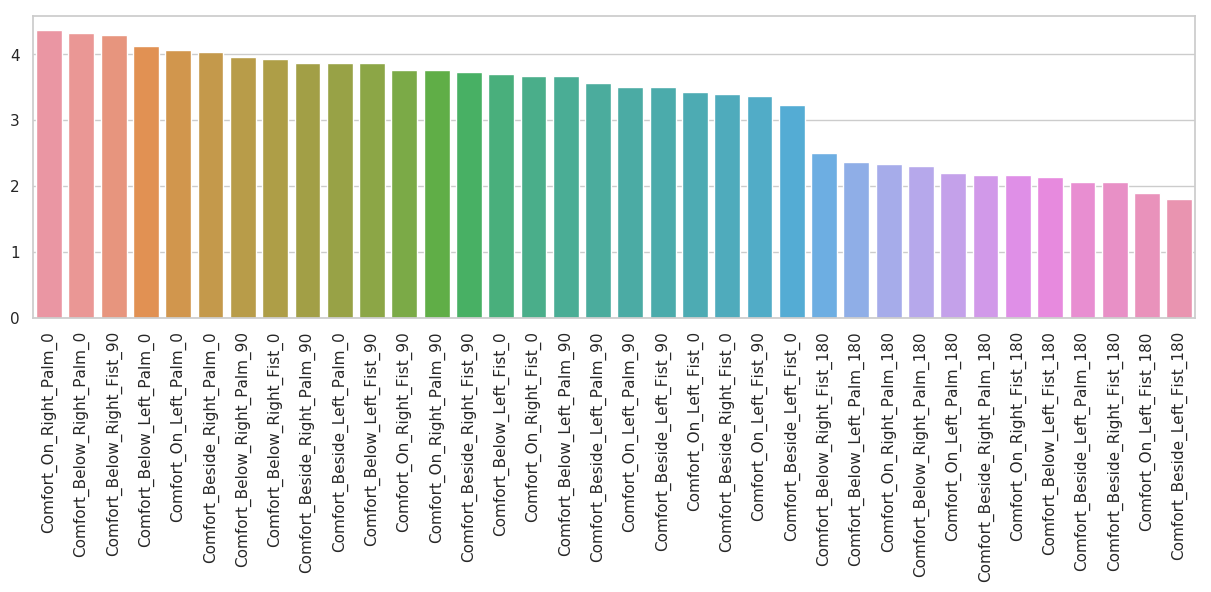

In [0]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,4))
plt.xticks(rotation=90)
# plt.setp(ax.get_xticklabels(), rotation=90)
ax = sns.barplot(x=df_postures_comfort_mean.sort_values(ascending=False).index, y=df_postures_comfort_mean.sort_values(ascending=False).values)

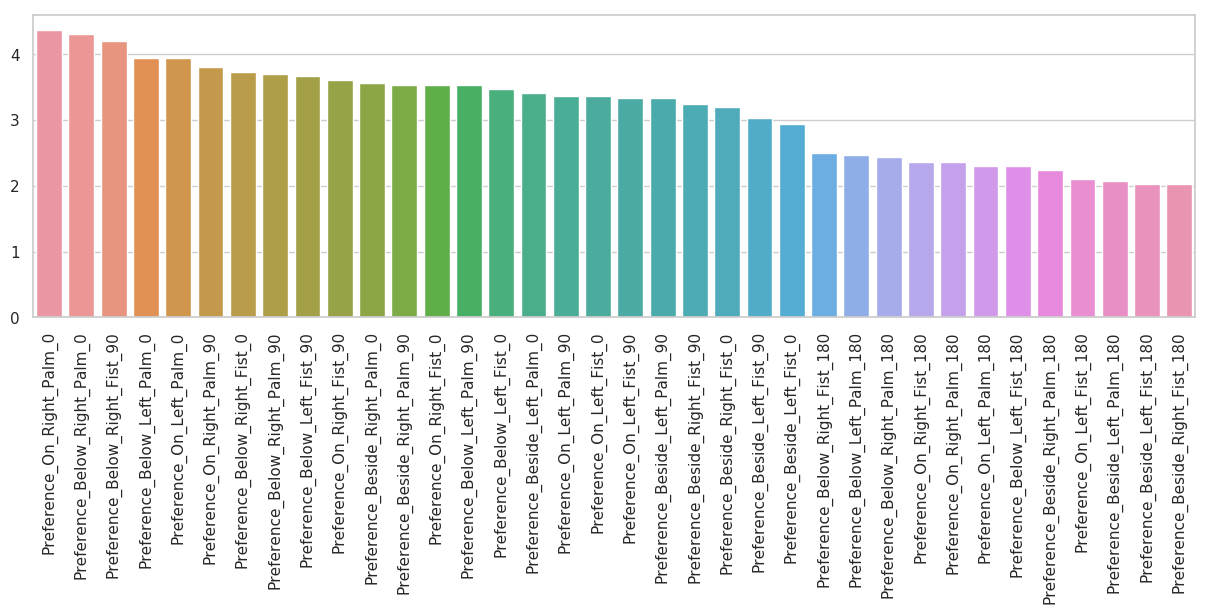

In [0]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,4))
plt.xticks(rotation=90)
# plt.setp(ax.get_xticklabels(), rotation=90)
ax = sns.barplot(x=df_postures_preference_mean.sort_values(ascending=False).index, y=df_postures_preference_mean.sort_values(ascending=False).values)


**To do**

- Compare postures across different dimensions (SURFACE, WRIST_ORIENTATION, HAND_FORM & DEXTERITY)
- Give design recomendations based on above^^

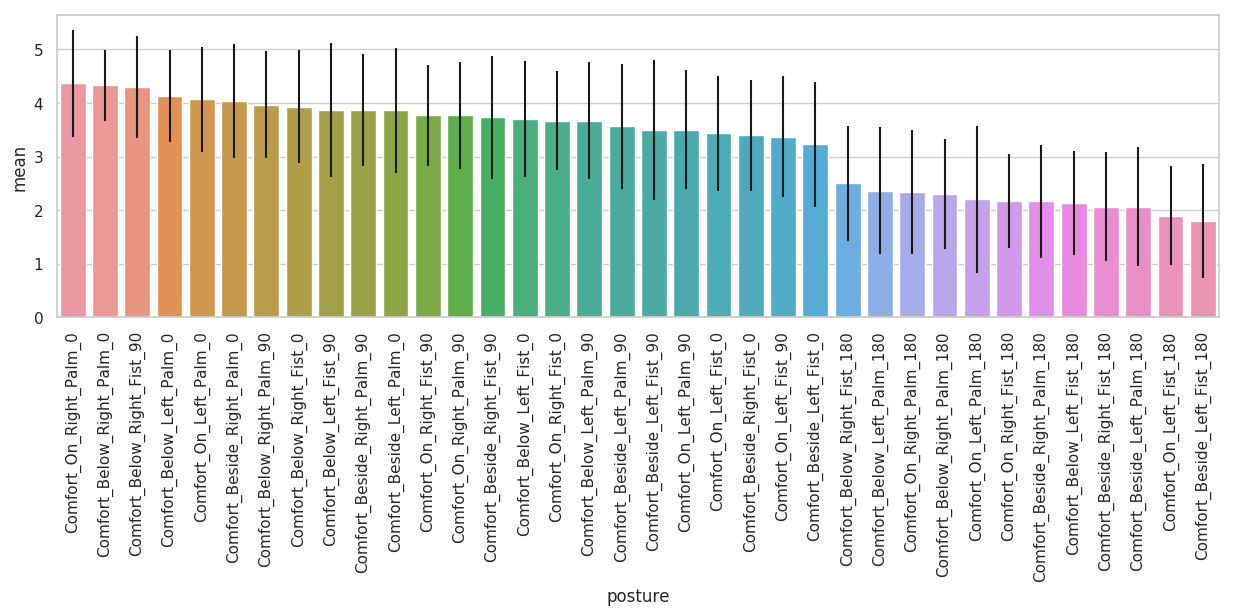

In [28]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,4))
plt.xticks(rotation=90)
# plt.setp(ax.get_xticklabels(), rotation=90)
ax = sns.barplot(x="posture", y="mean", data=df_postures_comfort_stats.sort_values(by = "mean", ascending=False), yerr=df_postures_comfort_stats.sort_values(by = "mean", ascending=False)["std"])

In [17]:
df_postures_comfort_stats.sort_values(by = "mean", ascending=False)

,posture,mean,std
19,Comfort_On_Right_Palm_0,4.366667,0.999425
7,Comfort_Below_Right_Palm_0,4.333333,0.660895
3,Comfort_Below_Right_Fist_90,4.300000,0.952311
6,Comfort_Below_Left_Palm_0,4.133333,0.860366
18,Comfort_On_Left_Palm_0,4.066667,0.980265
31,Comfort_Beside_Right_Palm_0,4.033333,1.066200
9,Comfort_Below_Right_Palm_90,3.966667,0.999425
1,Comfort_Below_Right_Fist_0,3.933333,1.048261
2,Comfort_Below_Left_Fist_90,3.866667,1.252125
33,Comfort_Beside_Right_Palm_90,3.866667,1.041661


In [39]:
df = pd.DataFrame({'Name': {0: 'John', 1: 'Bob', 2: 'Shiela'}, 
                   'Course': {0: 'Masters', 1: 'Graduate', 2: 'Graduate'}, 
                   'Age': {0: 27, 1: 23, 2: 21}}) 
df

,Name,Course,Age
0,John,Masters,27
1,Bob,Graduate,23
2,Shiela,Graduate,21


In [44]:
pd.melt(df, id_vars =['Name'], value_vars =['Course'])
# pd.melt(df, id_vars =['Name'])


,Name,variable,value
0,John,Course,Masters
1,Bob,Course,Graduate
2,Shiela,Course,Graduate
